In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [2]:
!pip install researchpy

In [3]:
import researchpy as rp

In [4]:
file = "caffeine.csv"

In [5]:
df = pd.read_csv(file)

# Looking at Data

In [6]:
df

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [7]:
df.columns

Index(['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type'], dtype='object')

In [8]:
df.describe()

,Volume (ml),Calories,Caffeine (mg)
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [10]:
df.nunique()

drink            610
Volume (ml)       70
Calories          98
Caffeine (mg)    162
type               6
dtype: int64

In [11]:
rp.summary_cont(df[["Calories","Caffeine (mg)","Volume (ml)"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Calories,610.0,75.5279,94.7999,3.8383,67.9899,83.0659
1,Caffeine (mg),610.0,134.6934,155.3629,6.2905,122.3398,147.0471
2,Volume (ml),610.0,346.5436,143.7477,5.8202,335.1136,357.9737


CORRELATİON

In [12]:
df.corr()

,Volume (ml),Calories,Caffeine (mg)
Volume (ml),1.000000,0.341998,0.110770
Calories,0.341998,1.000000,-0.126021
Caffeine (mg),0.110770,-0.126021,1.000000


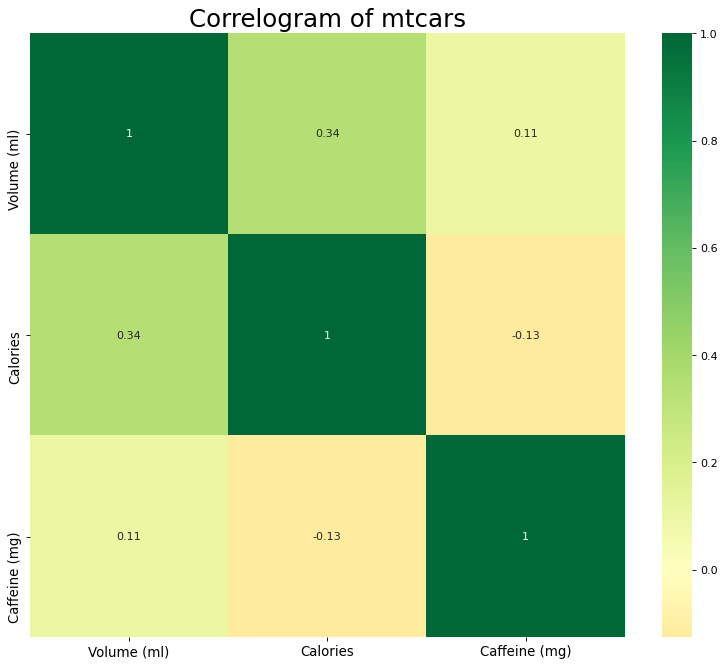

In [13]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Sorting by Caffeine

In [14]:
new = df.sort_values(by=['Caffeine (mg)'], inplace=False, ascending=False)
new

,drink,Volume (ml),Calories,Caffeine (mg),type
85,Black Label Brewed Coffee,354.882,0,1555,Coffee
102,Very Strong Coffee,354.882,0,1350,Coffee
92,Devils Brew Extreme Caffeine Coffee,354.882,0,1325,Coffee
101,Taft Coffee (EU),354.882,0,1182,Coffee
95,High Voltage Coffee (AU),354.882,0,1150,Coffee
...,...,...,...,...,...
507,Squirt Soda,354.882,140,0,Soft Drinks
511,Vernors Ginger Ale,354.882,140,0,Soft Drinks
516,Mucho Mango Energy Drink,236.588,100,0,Soft Drinks
437,7-Up,354.882,140,0,Soft Drinks


In [15]:
df["type"].value_counts()

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

# Group by

In [16]:
gk = df.groupby('type')
coffe = gk.get_group('Coffee')
coffe

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
168,Nescafe 3 in 1 Instant Coffee,177.441000,74,50,Coffee
169,Gloria Jean's Coffee,59.975058,0,67,Coffee
170,Biggby Espresso,59.147000,0,100,Coffee
171,Greek Coffee (Metrios),59.147000,25,50,Coffee


In [17]:
coffe.mean()

Volume (ml)      335.870855
Calories          73.497110
Caffeine (mg)    200.589595
dtype: float64

In [18]:
energy = gk.get_group('Energy Drinks')
energy

,drink,Volume (ml),Calories,Caffeine (mg),type
173,28 Black Energy Drink,250.19181,125,80,Energy Drinks
174,4 Purpose Energy Drink,250.19181,70,70,Energy Drinks
175,BEEBAD Energy Drink,250.19181,110,80,Energy Drinks
176,Black Bruin Energy Drink,250.19181,122,38,Energy Drinks
177,Blu Frog Energy Drink,250.19181,90,80,Energy Drinks
...,...,...,...,...,...
387,Redline Princess,236.58800,0,300,Energy Drinks
388,Redline Xtreme Energy Drink,236.58800,0,316,Energy Drinks
389,Roaring Lion Energy Drink,236.58800,100,77,Energy Drinks
390,Spark Energy Drink Mix,236.58800,15,120,Energy Drinks


In [19]:
energy.mean()

Volume (ml)      388.971198
Calories          86.671233
Caffeine (mg)    147.867580
dtype: float64

In [20]:
soft = gk.get_group('Soft Drinks')
soft

,drink,Volume (ml),Calories,Caffeine (mg),type
428,Red Bull Simply Cola,250.19181,0,32,Soft Drinks
429,Afri Cola,330.04026,139,83,Soft Drinks
430,Fritz Kola (EU),330.04026,135,83,Soft Drinks
431,Pepsi Max (UK),330.04026,0,43,Soft Drinks
432,Premium Cola (EU),330.04026,132,83,Soft Drinks
...,...,...,...,...,...
513,Wild Cherry Pepsi,354.88200,160,38,Soft Drinks
514,Zevia Cola,354.88200,0,45,Soft Drinks
515,Boost Nutritional Drink,236.58800,240,5,Soft Drinks
516,Mucho Mango Energy Drink,236.58800,100,0,Soft Drinks


In [21]:
tea = gk.get_group('Tea')
tea

,drink,Volume (ml),Calories,Caffeine (mg),type
518,PG Tips Black Tea,200.50833,0,50,Tea
519,Sencha Green Tea Shot,189.27040,0,40,Tea
520,Xingtea Iced Green Tea,694.97725,50,110,Tea
521,Gold Peak Tea,547.10975,0,48,Tea
522,Pure Leaf Iced Tea,547.10975,160,69,Tea
...,...,...,...,...,...
579,Yerba Mate Tea,236.58800,0,40,Tea
580,YMateina Yerba Mate,236.58800,0,80,Tea
581,Zest Highly Caffeinated Tea,236.58800,0,150,Tea
582,Oregon Chai Tea,177.44100,130,45,Tea


# mean values comparison

In [34]:
coffe_mean=[]
energy_mean=[]
soft_mean=[]
tea_mean=[]
col_names=["Calories","Caffeine (mg)","Volume (ml)"]
for col in col_names:
    coffe_mean.append(coffe[col].mean())
    energy_mean.append(energy[col].mean())
    soft_mean.append(soft[col].mean())
    tea_mean.append(tea[col].mean())
    


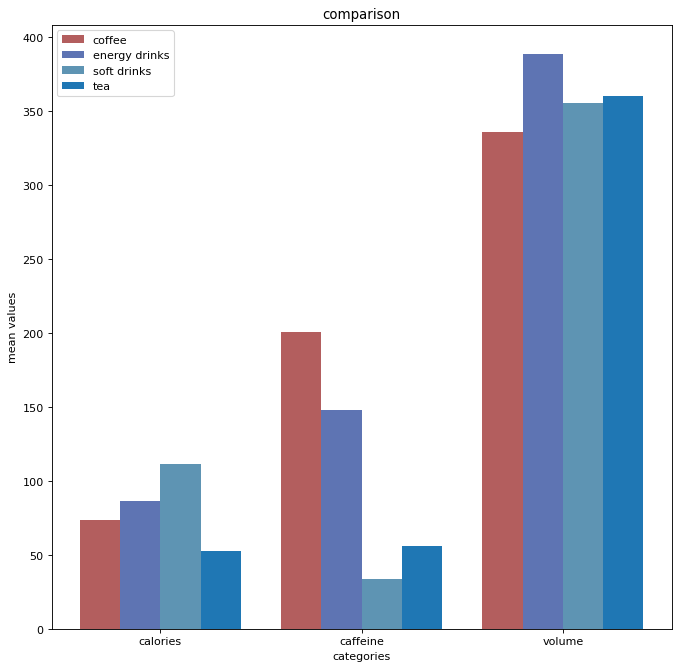

In [35]:


  
X = ['calories','caffeine','volume']


color1 = '#B35E5E'
color2 = '#5E74B3'
color3 = '#5E94B3'

w = 0.2

bar1 = np.arange(len(X))
bar2 = [i + w for i in bar1] 
bar3 = [i + w for i in bar2]
bar4= [i+w for i in bar3]

plt.figure(figsize=(10,10), dpi= 80)

plt.bar(bar1, coffe_mean, w, label = 'coffee', color = color1)
plt.bar(bar2, energy_mean, w, label = 'energy drinks',color = color2)
plt.bar(bar3,soft_mean,w,label = 'soft drinks',color = color3)
plt.bar(bar4,tea_mean,w,label = 'tea')

  

plt.xlabel("categories")
plt.ylabel("mean values")
plt.title("comparison")
plt.xticks(bar1+0.3,X)

plt.legend()

plt.show()

# Highest caffeine concentration

In [36]:
new["per volume caffeine"] = new["Caffeine (mg)"]/new["Volume (ml)"]
new


,drink,Volume (ml),Calories,Caffeine (mg),type,per volume caffeine
85,Black Label Brewed Coffee,354.882,0,1555,Coffee,4.381738
102,Very Strong Coffee,354.882,0,1350,Coffee,3.804081
92,Devils Brew Extreme Caffeine Coffee,354.882,0,1325,Coffee,3.733635
101,Taft Coffee (EU),354.882,0,1182,Coffee,3.330685
95,High Voltage Coffee (AU),354.882,0,1150,Coffee,3.240514
...,...,...,...,...,...,...
507,Squirt Soda,354.882,140,0,Soft Drinks,0.000000
511,Vernors Ginger Ale,354.882,140,0,Soft Drinks,0.000000
516,Mucho Mango Energy Drink,236.588,100,0,Soft Drinks,0.000000
437,7-Up,354.882,140,0,Soft Drinks,0.000000


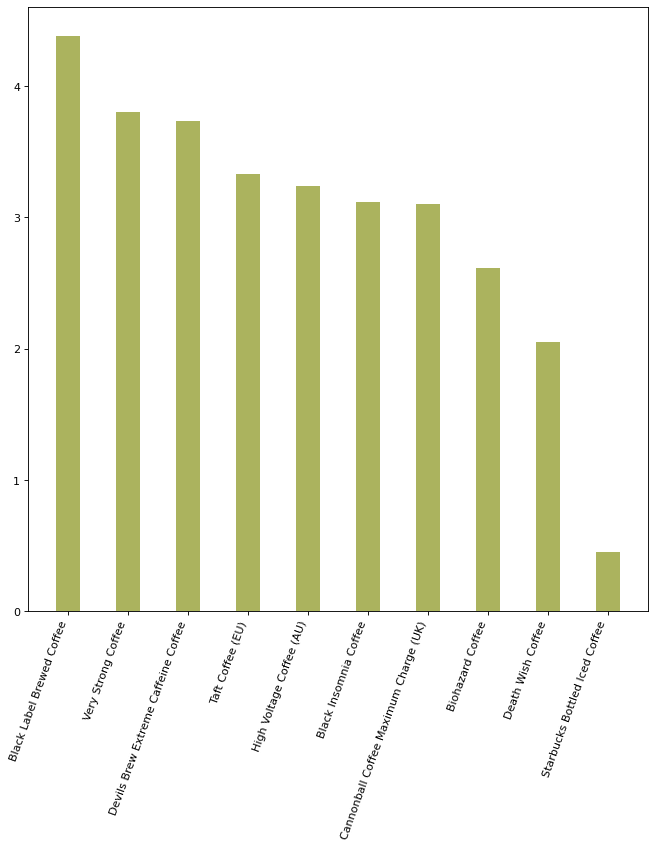

In [37]:
color4 = '#ABB35E'
name = new["drink"].head(10)
caff = new["per volume caffeine"].head(10)
plt.figure(figsize=(10,10), dpi= 80)
plt.bar(name[0:10], caff[0:10],0.4,color=color4)
plt.xticks(rotation=70, horizontalalignment='right')



plt.show()

# Zero calories

In [38]:
st = df.groupby('Calories')
zero = st.get_group(0)
zero

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
9,TrueStart Performance Coffee,150.824850,0,95,Coffee
...,...,...,...,...,...
604,Limitless Sparkling Water,354.882000,0,35,Water
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water


In [39]:
zero["type"].value_counts()

Coffee           67
Energy Drinks    37
Tea              35
Soft Drinks      23
Energy Shots     19
Water            19
Name: type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

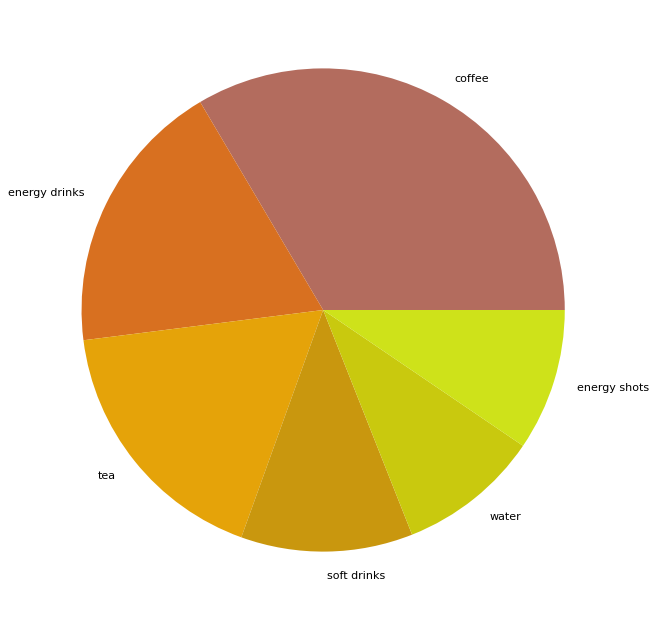

In [40]:
y = zero["type"].value_counts()
mylabels = ["coffee","energy drinks","tea","soft drinks","water","energy shots"]
my_colors = ["#B36C5E","#D87020","#E5A309","#C9970E","#C9C90E","#CEE21A"]
plt.figure(figsize=(10,10), dpi= 80)
plt.pie(y, labels=mylabels,colors= my_colors)
plt.show

In [41]:
zero["Caffeine (mg)"]

0      277
1      145
3      430
4       66
9       95
      ... 
604     35
605     55
606      0
607    100
609     60
Name: Caffeine (mg), Length: 200, dtype: int64